# BANK MARKETING-TERM DEPOSIT PROJECT

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from collections import Counter
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing train data
train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
#importing test data
test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [4]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [5]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [6]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [10]:
display(train.shape, test.shape)

(31647, 18)

(13564, 17)

In [11]:
# merging the train and test data
Deposit=pd.concat([train, test])
Deposit.shape

(45211, 18)

In [12]:
Deposit

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,NaN
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,NaN
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,NaN
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,NaN


In [64]:
# categorical features and its unique values
for col in Deposit.select_dtypes(include='object').columns:
    print(col)
    print(Deposit[col].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes' nan]


In [67]:
# find missing values
features_na=[features for features in Deposit.columns if Deposit[features].isnull().sum()>0]
for feature in features_na:
    print(feature, np.round(Deposit[feature].isnull().mean(), 4), '% missing values')
else:
    print("no missing values found")

subscribed 0.3 % missing values
no missing values found


In [13]:
# find features with one value
for column in Deposit.columns:
    print(column,Deposit[column].nunique ())

ID 45211
age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
subscribed 2


In [14]:
# explore the categorical features
categorical_features=[feature for feature in Deposit.columns if((Deposit[feature].dtypes=='O') &(feature not in['subscribed']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [15]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(Deposit[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


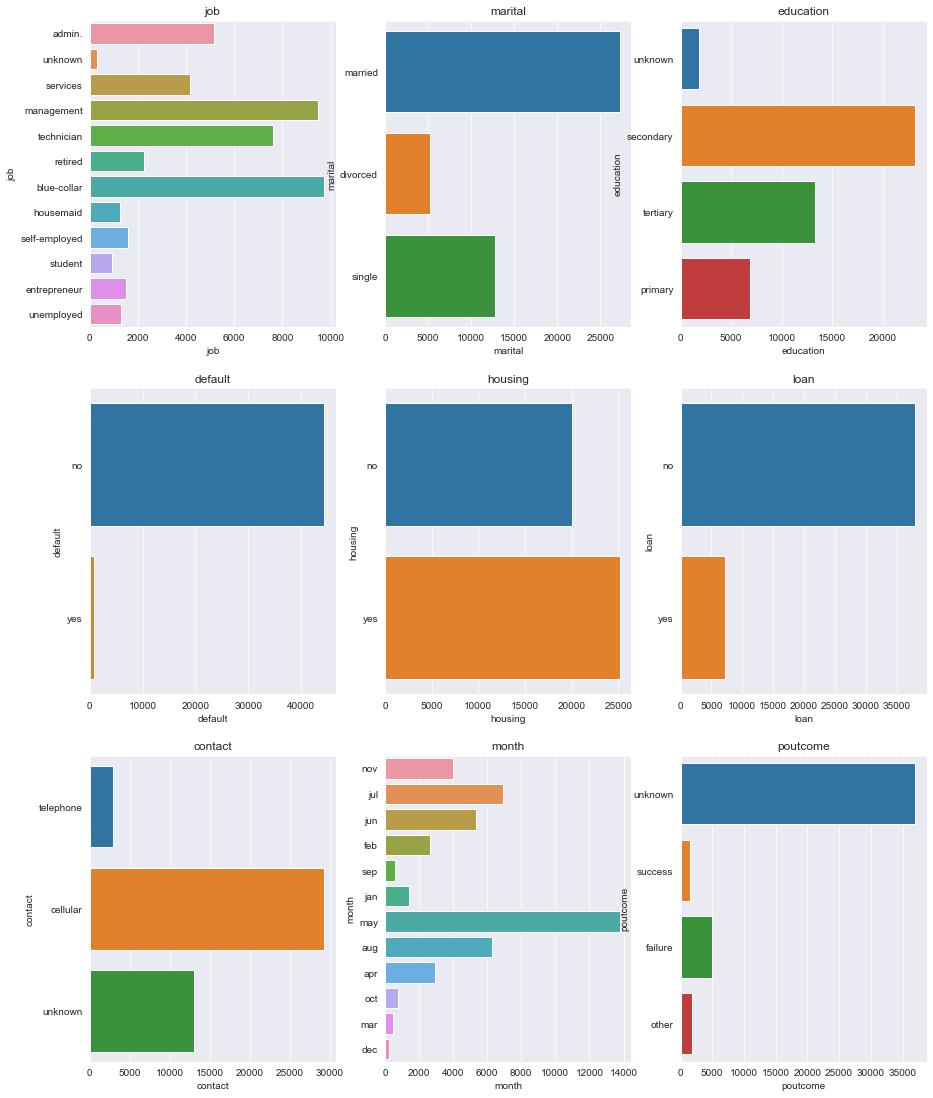

In [16]:
# Categorical feature distribution
plt.figure(figsize=(15,80), facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,3, plotnumber)
    sns.countplot(y=categorical_feature, data=Deposit)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()
    

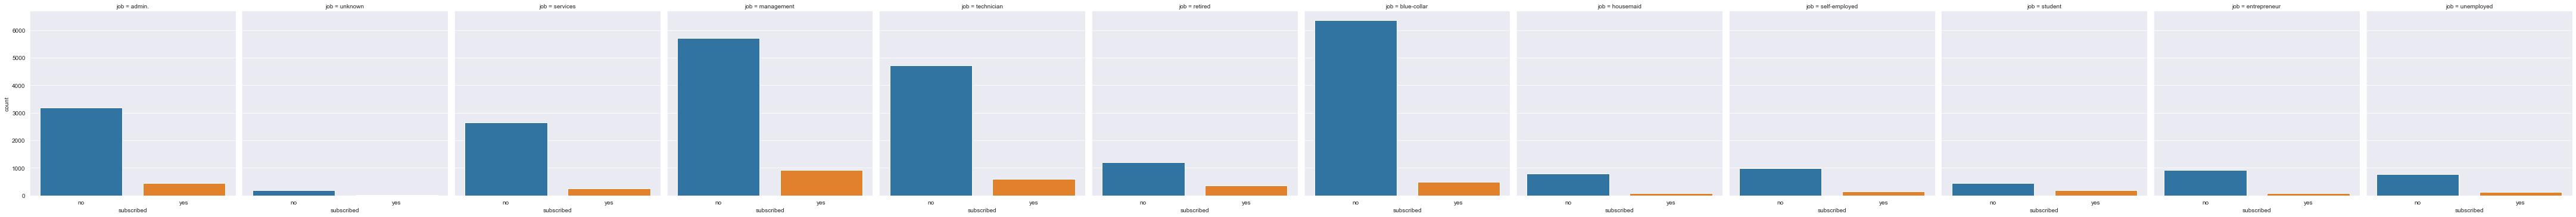

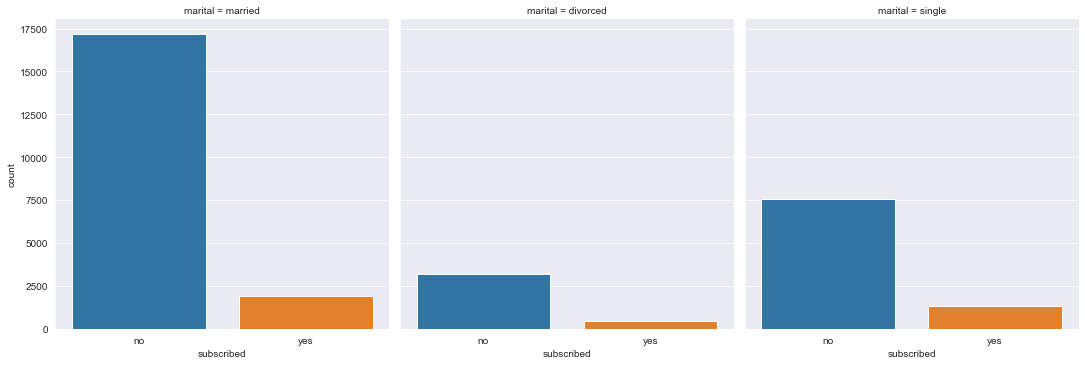

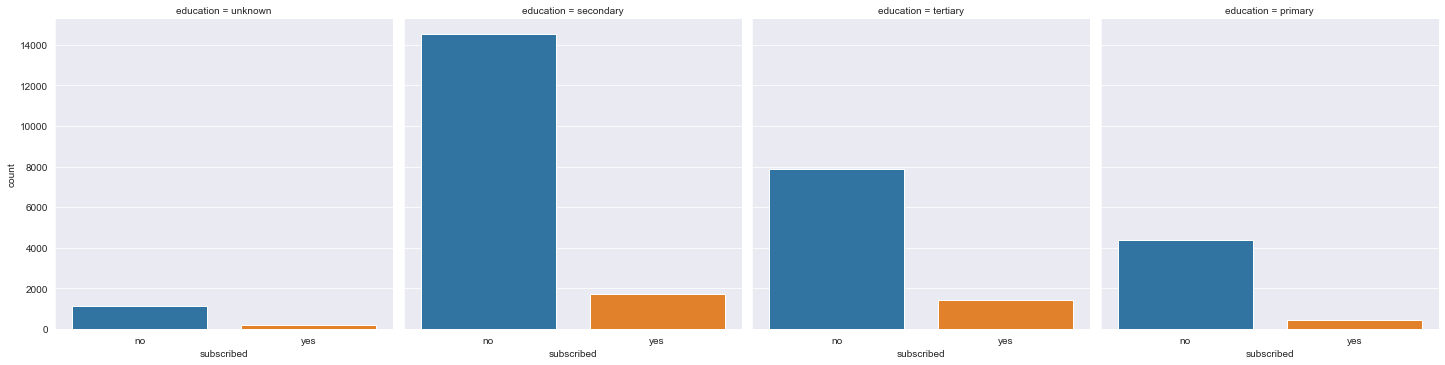

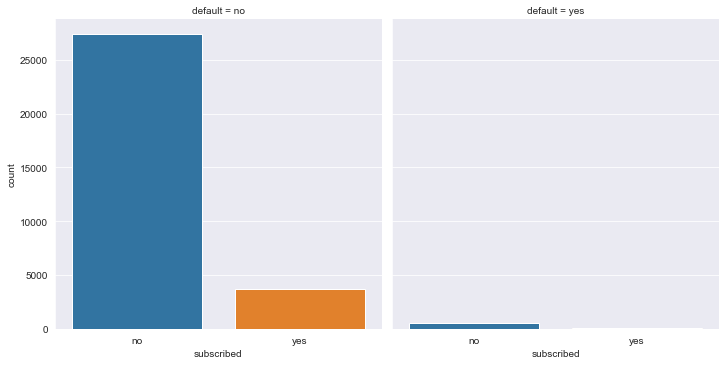

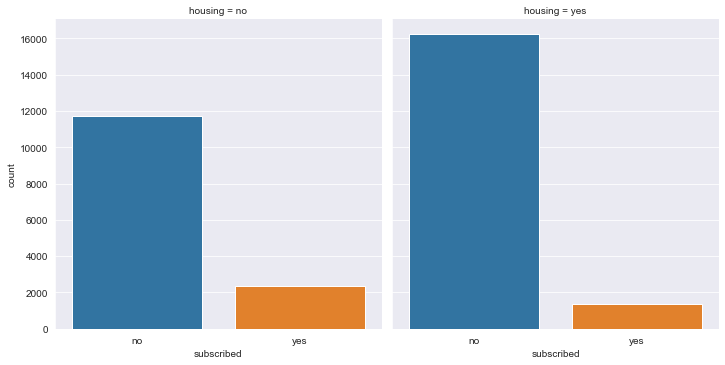

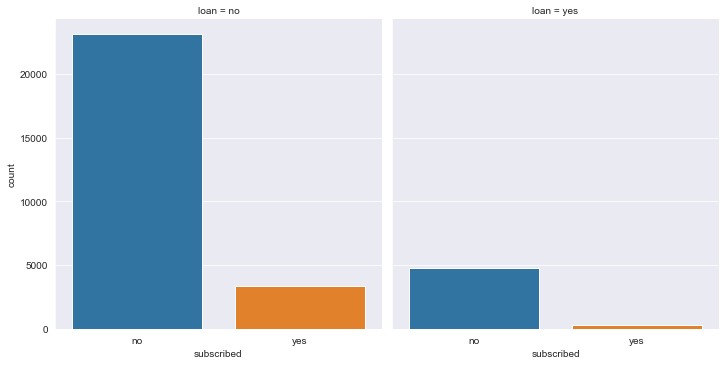

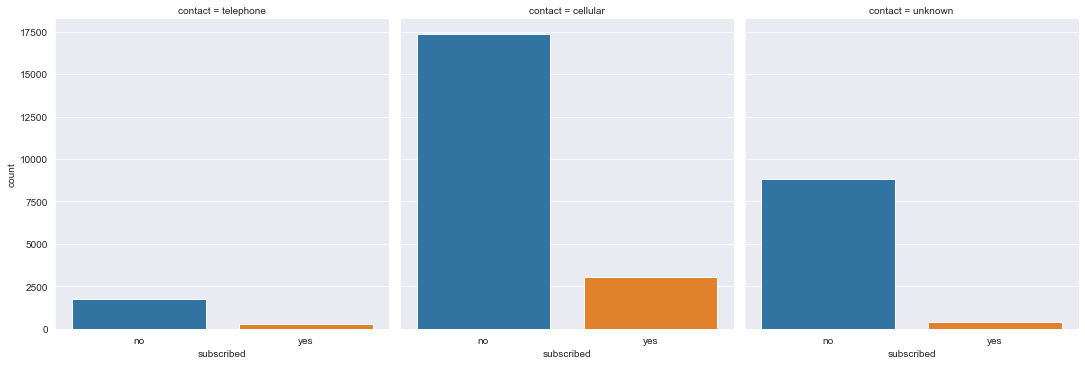

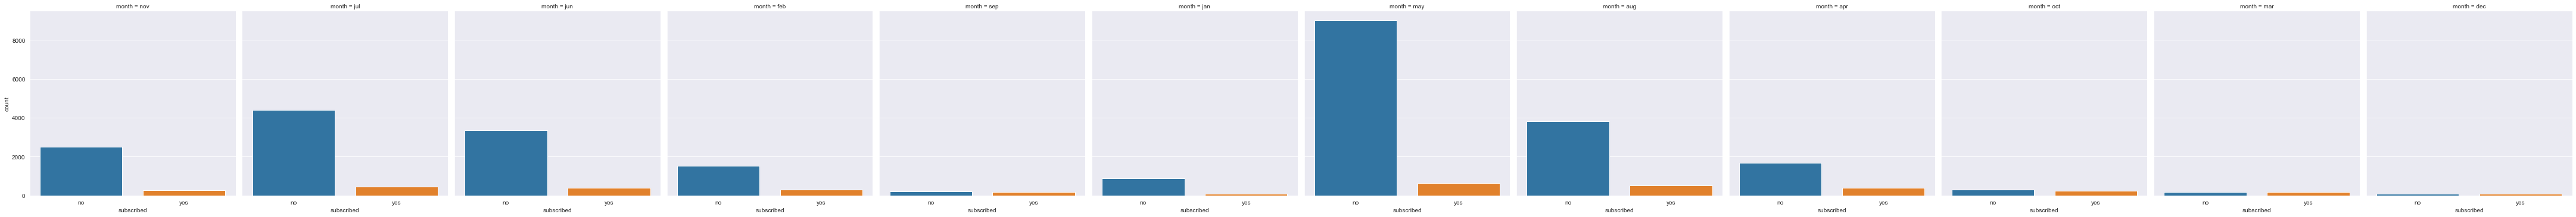

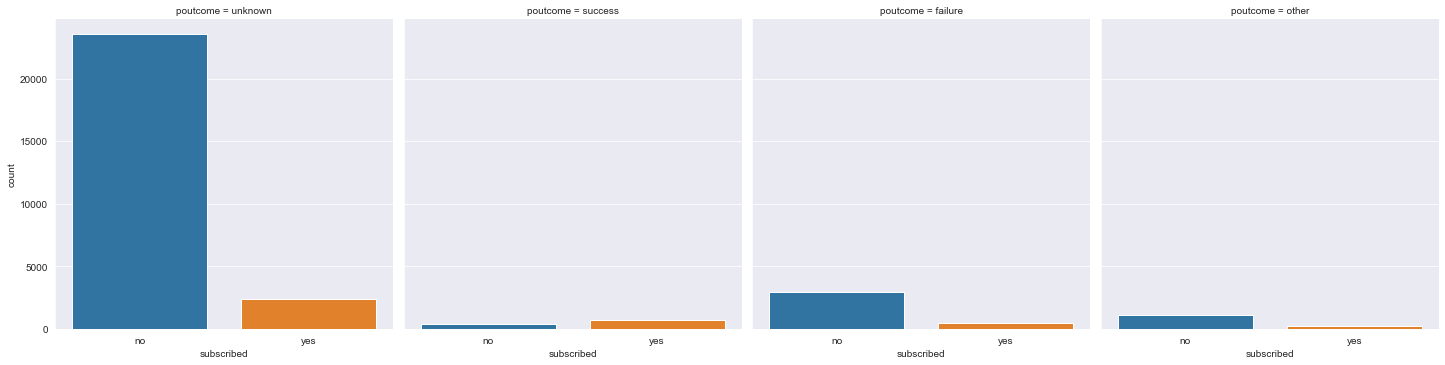

In [17]:
# relationship between categorical features and labels
# find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='subscribed', col=categorical_feature, kind='count', data=Deposit)
plt.show()

In [18]:
# check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(Deposit.groupby(['subscribed', categorical_feature]).size())

subscribed  job          
no          admin.           3179
            blue-collar      6353
            entrepreneur      923
            housemaid         795
            management       5716
            retired          1212
            self-employed     983
            services         2649
            student           453
            technician       4713
            unemployed        776
            unknown           180
yes         admin.            452
            blue-collar       489
            entrepreneur       85
            housemaid          79
            management        923
            retired           362
            self-employed     140
            services          254
            student           182
            technician        594
            unemployed        129
            unknown            26
dtype: int64
subscribed  marital 
no          divorced     3185
            married     17176
            single       7571
yes         divorced      445
    

In [19]:
# explore the numerical features 
numerical_features=[feature for feature in Deposit.columns if((Deposit[feature].dtypes !='O') &(feature not in['subscribed']))]
print('number of numerical variables:', len(numerical_features))

number of numerical variables: 8


In [68]:
# visualize the numerical variables
Deposit[numerical_features]

,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,44,2,-1,0
1,40576,31,3,20,91,2,-1,0
2,15320,27,891,18,240,1,-1,0
3,43962,57,3287,22,867,1,84,3
4,29842,31,119,4,380,1,-1,0
...,...,...,...,...,...,...,...,...
13559,23465,39,45,28,148,4,-1,0
13560,11743,54,2281,20,158,1,-1,0
13561,28292,35,285,29,136,1,-1,0
13562,45163,29,464,9,208,2,91,3


In [69]:
# find discrete numerical features
discrete_features=[feature for feature in numerical_features if len(Deposit[feature].unique())<25]
print("Discrete Variables Count: ()".format(len(discrete_features)))

Discrete Variables Count: ()


In [70]:
# find continous numerical features
continous_features=[feature for feature in numerical_features if feature not in discrete_features+['subscribed']]
print("continous feature Count: ()".format(len(continous_features)))

continous feature Count: ()


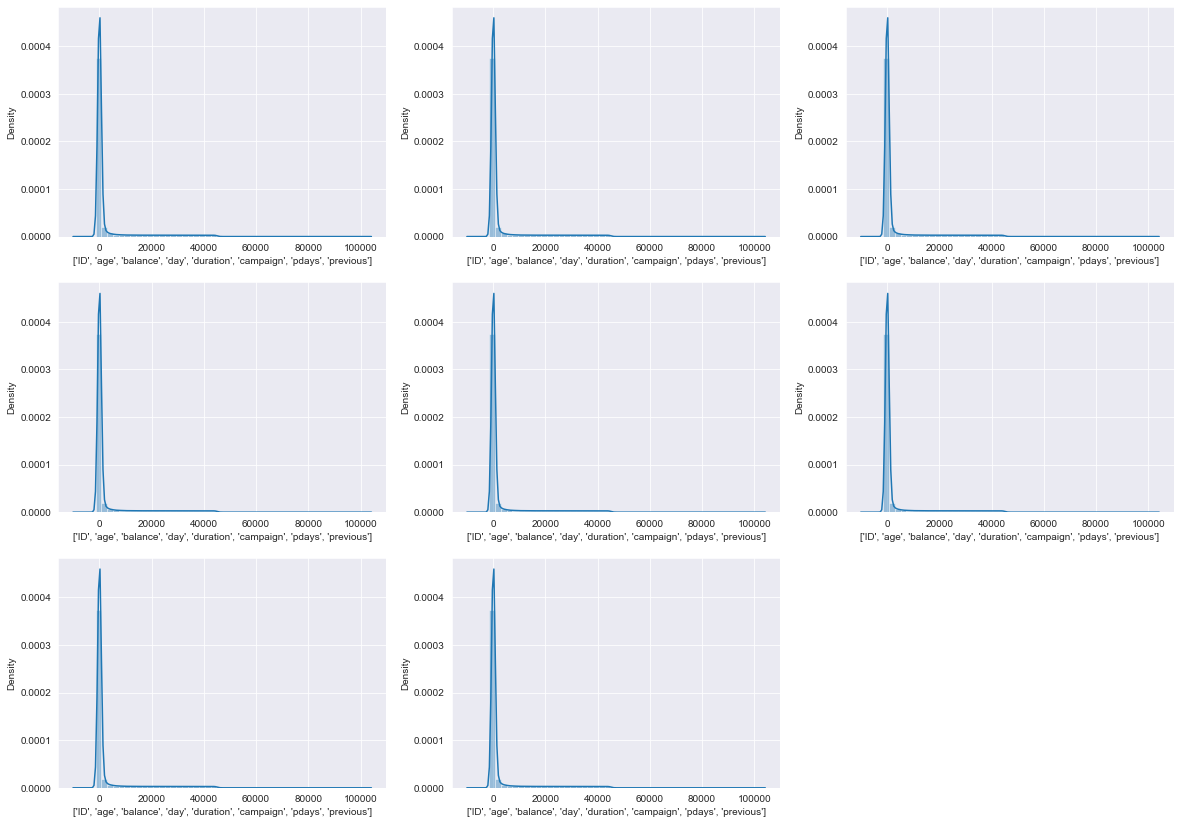

In [71]:
# distribution of continous numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber=1
for continous_feature in continous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(Deposit[continous_features])
    plt.xlabel(continous_features)
    plotnumber+=1
plt.show()

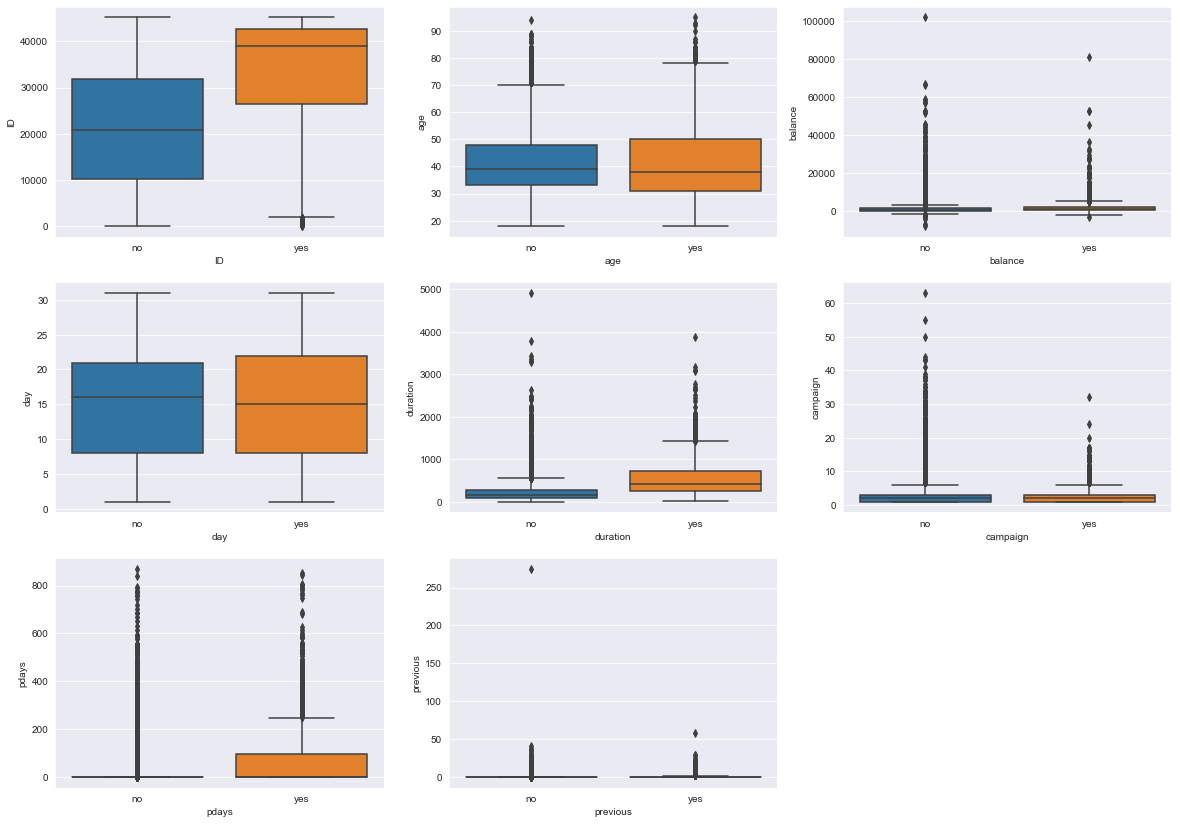

In [72]:
# boxplot to show target  distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber=1
for feature in continous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x="subscribed", y=Deposit[feature], data=Deposit)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

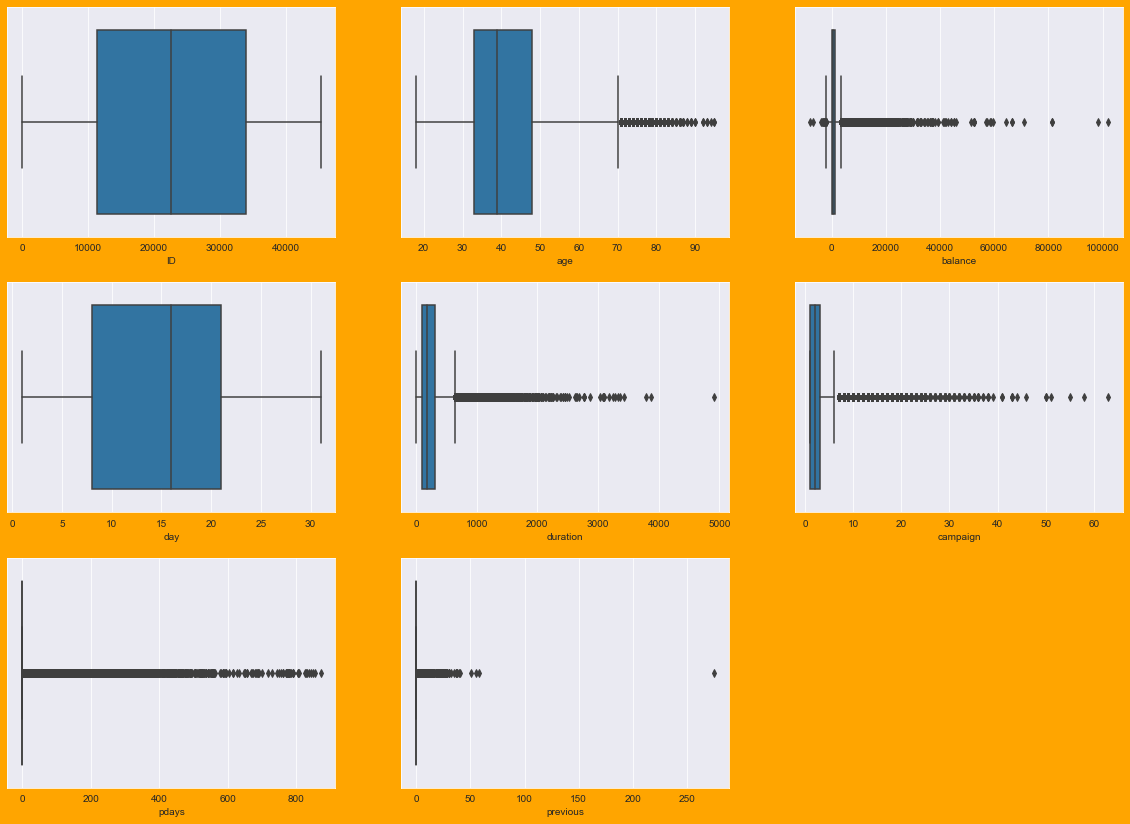

In [25]:
# outliers in numerical features
plt.figure(figsize=(20,60), facecolor='orange')
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3, plotnumber)
    sns.boxplot(Deposit[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<AxesSubplot:>

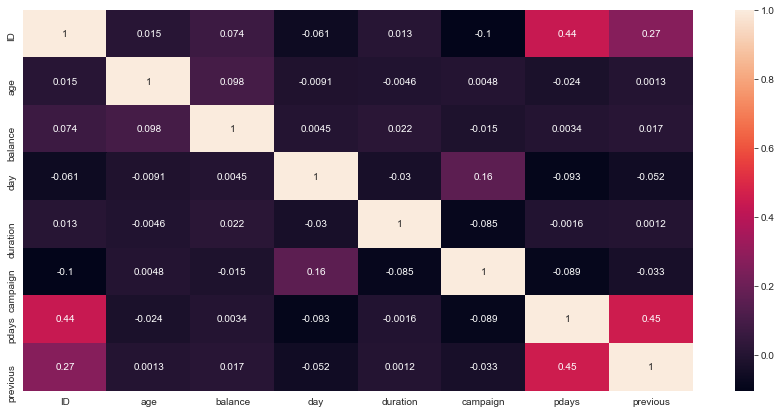

In [26]:
# explore the Correlation between numerical features
# checking for correlation
cor_mat=Deposit.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)




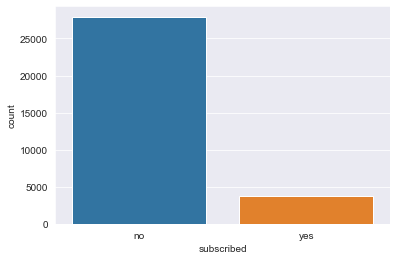

In [27]:
# checking whether the data set is balanced or not based on target values in classification
# total patient count based on cardio_results
sns.countplot(x='subscribed', data=Deposit)
plt.show()

In [28]:
Deposit['subscribed'].groupby(Deposit['subscribed']).count()

subscribed
no     27932
yes     3715
Name: subscribed, dtype: int64

In [29]:
# lets create a new dataframe using copy command
Deposit2=Deposit.copy()
Deposit2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,NaN
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,NaN
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,NaN
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,NaN


In [30]:
print(Deposit2.shape)
Deposit2.head()

(45211, 18)


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [31]:
Deposit2.groupby(['subscribed','default']).size()

subscribed  default
no          no         27388
            yes          544
yes         no          3674
            yes           41
dtype: int64

In [32]:
Deposit2.drop(['default'], axis=1, inplace=True)

In [33]:
Deposit2.groupby(['subscribed','pdays']).size()

subscribed  pdays
no          -1       23553
             1           6
             2          24
             4           1
             5           7
                     ...  
yes          792         1
             804         1
             805         1
             842         1
             854         1
Length: 804, dtype: int64

In [34]:
# drop pdays as it has -1 value for around 40%
Deposit2.drop(['pdays'], axis=1, inplace=True)

In [35]:
# remove outliers in feature 'age'
Deposit2.groupby('age', sort=True)['age'].count()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [37]:
# remove outliers in feature balance
Deposit2.groupby(['subscribed','balance'], sort=True)['balance'].count()
# these ouliers should not be removed as balance gos high, client show interest on deposit


subscribed  balance
no          -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
yes          32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Name: balance, Length: 7969, dtype: int64

In [38]:
# remove outlier in feature duration
Deposit2.groupby(['subscribed','duration'], sort=True)['duration'].count()

subscribed  duration
no          0            1
            2            3
            3            3
            4           11
            5           20
                        ..
yes         2775         1
            3076         1
            3102         1
            3183         1
            3881         1
Name: duration, Length: 2381, dtype: int64

In [39]:
# remove outliers in feature campaign
Deposit2.groupby(['subscribed', 'campaign'], sort=True)['campaign'].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
                        ...  
yes         16              2
            17              6
            20              1
            24              1
            32              1
Name: campaign, Length: 65, dtype: int64

In [40]:
Deposit3=Deposit2[Deposit2['campaign']<33]

In [41]:
Deposit3.groupby(['subscribed','campaign'], sort=True)['campaign'].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
            6             845
            7             484
            8             335
            9             221
            10            173
            11            115
            12            100
            13             88
            14             65
            15             58
            16             52
            17             46
            18             37
            19             30
            20             36
            21             19
            22             18
            23             13
            24             12
            25             17
            26              9
            27              8
            28             14
            29             12
            30              6
            31              9
            32              5
yes         1      

In [42]:
# remove outlier in feature previous
Deposit3.groupby(['subscribed','previous'], sort=True)['previous'].count()

subscribed  previous
no          0           23525
            1            1499
            2            1154
            3             580
            4             382
            5             227
            6             128
            7             102
            8              56
            9              46
            10             33
            11             38
            12             25
            13             22
            14              9
            15             15
            16              8
            17              8
            18              5
            19              7
            20              5
            21              3
            22              3
            23              5
            24              2
            25              4
            26              1
            27              4
            28              1
            29              1
            32              1
            35              1
            37     

In [74]:
Deposit4=Deposit3[Deposit3['previous']<31]


In [75]:
Deposit4.groupby(['subscribed','previous'], sort=True)['previous'].count()

subscribed  previous
no          0           23525
            1            1499
            2            1154
            3             580
            4             382
            5             227
            6             128
            7             102
            8              56
            9              46
            10             33
            11             38
            12             25
            13             22
            14              9
            15             15
            16              8
            17              8
            18              5
            19              7
            20              5
            21              3
            22              3
            23              5
            24              2
            25              4
            26              1
            27              4
            28              1
            29              1
yes         0            2371
            1             422
            2      

In [76]:
cat_columns=['job', 'marital','education','contact','month','poutcome']
for col in cat_columns:
    Deposit4=pd.concat([Deposit4.drop(col, axis=1), pd.get_dummies(Deposit4[col],prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)])
    

In [77]:
Deposit4.head()

,ID,age,balance,housing,loan,day,duration,campaign,previous,subscribed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,26110.0,56.0,1933.0,no,no,19.0,44.0,2.0,0.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40576.0,31.0,3.0,no,no,20.0,91.0,2.0,0.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15320.0,27.0,891.0,yes,no,18.0,240.0,1.0,0.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43962.0,57.0,3287.0,no,no,22.0,867.0,1.0,3.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29842.0,31.0,119.0,yes,no,4.0,380.0,1.0,0.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
bool_columns=['housing', 'loan', 'subscribed']
for col in bool_columns:
    Deposit4[col+'_new']=Deposit4[col].apply(lambda x :1 if x == 'yes' else 0)
    Deposit4.drop(col, axis=1, inplace=True)

In [79]:
Deposit4.head()

,ID,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,subscribed_new
0,26110.0,56.0,1933.0,19.0,44.0,2.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,40576.0,31.0,3.0,20.0,91.0,2.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,15320.0,27.0,891.0,18.0,240.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
3,43962.0,57.0,3287.0,22.0,867.0,1.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
4,29842.0,31.0,119.0,4.0,380.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0


In [61]:
Deposit4.columns

Index(['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'housing_new', 'loan_new',
       'subscribed_new'],
      dtype='object')

In [80]:
# split data into training and test set
X=Deposit4.drop(['subscribed_new'], axis=1)
y=Deposit4['subscribed_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)



In [81]:
len(X_train)

2312243

In [82]:
len(X_test)

578061

In [83]:
# dropping columns as it has nan values
Deposit4.drop(['job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'month_may', 'month_nov', 'month_oct', 'month_sep','poutcome_other','poutcome_success','poutcome_unknown'], axis=1, inplace=True)

In [84]:
Deposit4

,ID,age,balance,day,duration,campaign,previous,job_management,job_retired,job_self-employed,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,housing_new,loan_new,subscribed_new
0,26110.0,56.0,1933.0,19.0,44.0,2.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,40576.0,31.0,3.0,20.0,91.0,2.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,15320.0,27.0,891.0,18.0,240.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
3,43962.0,57.0,3287.0,22.0,867.0,1.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
4,29842.0,31.0,119.0,4.0,380.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
13560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
13561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
13562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [85]:
# model Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import cross_val_score
model_score=cross_val_score(estimator=RandomForestClassifier(), X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())